In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df1=pd.read_csv('twitter.csv')
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [34]:
df=df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [35]:
df.drop(['id'],axis='columns',inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [36]:
df.isnull().values.any()  #False means there is no any missing values

False

In [37]:
positive=df[df['label']==0]
negative=df[df['label']==1]

In [38]:
positive.sample(5)

,label,tweet
14174,0,[1465483507.93] update @ #social #analytics #...
7729,0,-----------&gt; ali tmak @user wishes you ...
4073,0,whatâs your definition of success? #motiva...
22463,0,1st poetry book: done ( ). i took back some ve...
24296,0,wow! no @user in #tennis for 2 years. . leave...


In [39]:
negative.sample(5)

,label,tweet
4240,1,@user this should have been enough 2 just say ...
25144,1,@user #allahsoil bernanke bailed out wall stre...
16257,1,fuck donald trump! he will never be my preside...
25272,1,@user watch one u.s. #marine fearlessly take o...
12628,1,how is it that a man comes in last in a race b...


# Plotting WordCloud

In [40]:
sentences=df['tweet'].tolist()

In [41]:
sentences[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [42]:
len(sentences)

31962

In [43]:
sentence=' '.join(sentences)
len(sentence)

2740409

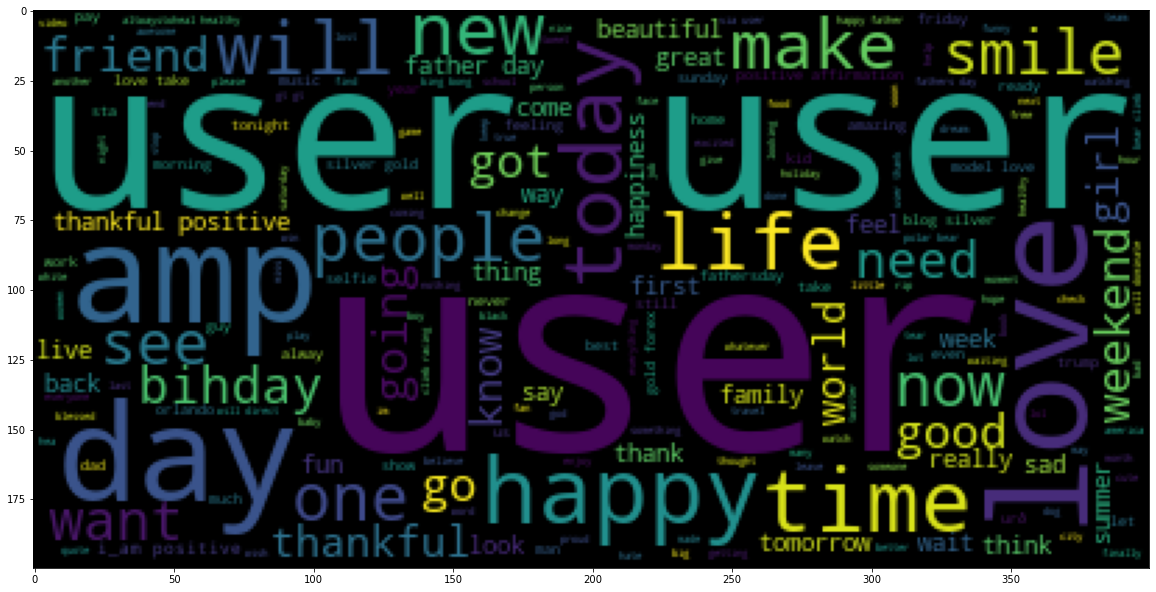

In [44]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence))

In [45]:
neg_sentences=negative['tweet'].tolist()
neg_sentence=' '.join(neg_sentences)
len(neg_sentences)

2242

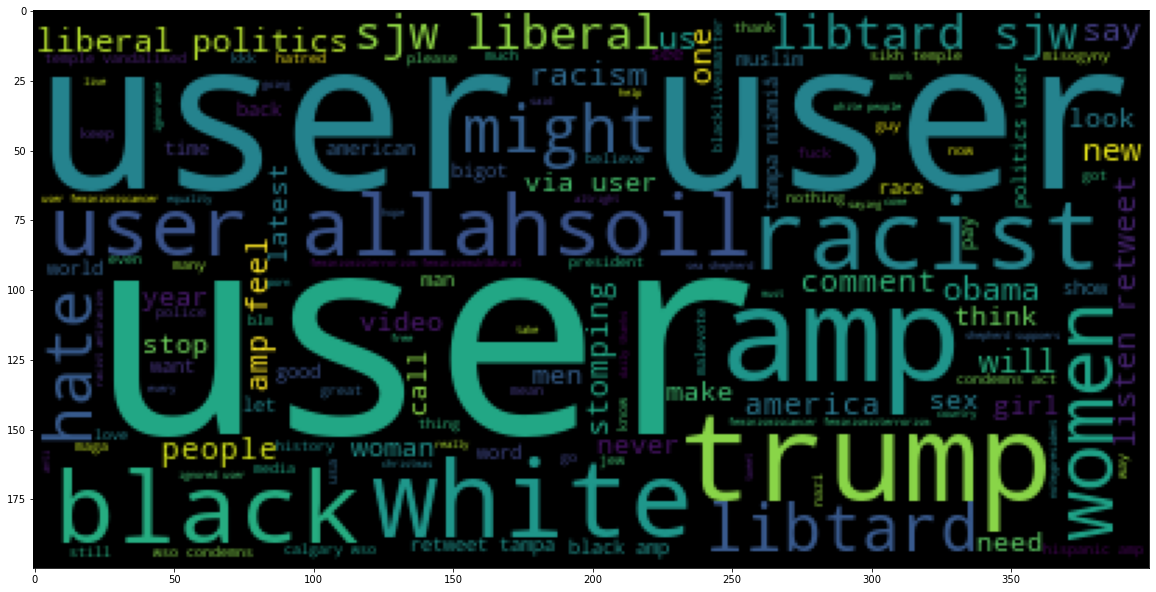

In [46]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentence))

# Data Cleaning-- Removing stop words and punctuations 

In [47]:
import nltk #Natural language tool kit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def message_cleaning(message):
    message_stop_cleaned=[word for word in message.split() if word.lower() not in stopwords.words('english')]
    message_stop_cleaned=' '.join(message_stop_cleaned)
    message_stop_punc_cleaned=[char for char in message_stop_cleaned if char not in string.punctuation]
    message_stop_punc_cleaned=''.join(message_stop_punc_cleaned)
    message_stop_punc_cleaned=[word for word in message_stop_punc_cleaned.split()]
    return message_stop_punc_cleaned

In [53]:
#message_cleaning(df['tweet']) this won't work
tweet_clean=df['tweet'].apply(message_cleaning)

In [57]:
tweet_clean[10]

['â\x86\x9d',
 'ireland',
 'consumer',
 'price',
 'index',
 'mom',
 'climbed',
 'previous',
 '02',
 '05',
 'may',
 'blog',
 'silver',
 'gold',
 'forex']

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=message_cleaning)
tweets_clean_vectorizer=CountVectorizer(analyzer=message_cleaning,dtype='uint8').fit_transform(df['tweet']).toarray()

In [67]:
tweets_clean_vectorizer.shape

(31962, 47512)

In [68]:
X=tweets_clean_vectorizer
Y=df['label']

In [70]:
X.shape,Y.shape

((31962, 47512), (31962,))

# Final Part

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [74]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,Y_train)

MultinomialNB()

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

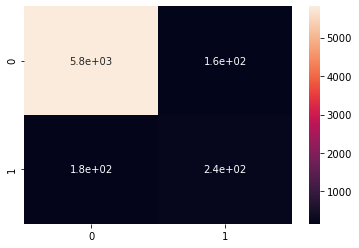

In [76]:
y_predicted=NB_classifier.predict(X_test)
cm=confusion_matrix(Y_test,y_predicted)
sns.heatmap(cm, annot=True)

In [78]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5970
           1       0.60      0.56      0.58       423

    accuracy                           0.95      6393
   macro avg       0.78      0.77      0.78      6393
weighted avg       0.94      0.95      0.95      6393

